In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import UnivariateSpline


In [70]:
df = pd.read_csv('Contour_data_2.csv')
df.keys()


Index(['TimeStep', 'Time', ' Phi ', ' Theta ', ' U ', 'Points:0', 'Points:1',
       'Points:2'],
      dtype='object')

In [71]:
grouped_time = df.groupby("TimeStep")
grouped_time.head()

TimeStep    Time   Phi    Theta       U   Points:0  Points:1  \
0               0     0.0    0.9 -0.55000  0.0000    15.269    20.559   
1               0     0.0    0.9 -0.55000  0.0000    15.440    20.374   
2               0     0.0    0.9 -0.55000  0.0000    14.967    20.723   
3               0     0.0    0.9 -0.55000  0.0000    15.214    20.598   
4               0     0.0    0.9 -0.55000  0.0000    14.803    20.891   
...           ...     ...    ...      ...     ...       ...       ...   
5121784       399  1900.0    0.9 -0.22725  1.9402    96.903   211.490   
5121785       399  1900.0    0.9 -0.22725  1.9385    96.902   211.350   
5121786       399  1900.0    0.9 -0.22724  1.9446    96.877   211.760   
5121787       399  1900.0    0.9 -0.22724  1.9480    96.869   212.000   
5121788       399  1900.0    0.9 -0.22724  1.9511    96.853   212.170   

         Points:2  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
5121784         0  
5121785         0  
5121786         0  
5121787         0  
5121788         0  

[2000 rows x 8 columns]

In [72]:
def mean_curvature( grouped_data  ):



    # Filter the data contour : 
    filtered_data = grouped_data[(grouped_data['Points:1'] >= 0) & (grouped_data['Points:1'] <= 40) & (grouped_data['Points:0'] > 0) ]


    # Unique the x data and y data in that resolution you work to find curvature : 

    x_uniq, indices = np.unique(filtered_data['Points:0'], return_index=True)

    y_uniq = filtered_data['Points:1'].iloc[indices]


    sorted_indices = np.argsort(x_uniq)

    x_sorted = x_uniq[sorted_indices]

    y_sorted = y_uniq.values[sorted_indices]

    # Fit a spline curve

    spline = UnivariateSpline(x_sorted, y_sorted, s=0.0)

    # Calculate the first and second derivatives of the spline
    y_prime = spline.derivative(n=1)

    y_double_prime = spline.derivative(n=2)

    # Evaluate derivatives at x values

    # first_derivative_values = y_prime(x_sorted)

    # second_derivative_values = y_double_prime(x_sorted)


    # # Calculate curvature using the formula: curvature = |f''(x)| / (1 + (f'(x))^2)^(3/2)
    # curvature_values = np.abs(second_derivative_values) / (1 + first_derivative_values**2)**(3/2)


    # # Calculate mean curvature by integrating over the length of the curve
    # length_of_curve = np.trapz(np.sqrt(1 + first_derivative_values**2), x=x_sorted)
    # mean_curvature = np.trapz(curvature_values, x=x_sorted) / length_of_curve



    # get Theta i : 

    mean_theta_filtered = np.mean(filtered_data[' Theta '].values)

    mean_x_filtered = np.mean(filtered_data['Points:0'].values)

    mean_U_filtered =   np.mean(filtered_data[' U '].values)






    

    return mean_curvature, mean_theta_filtered, mean_x_filtered, mean_U_filtered











In [73]:
mean_curvature_list = np.zeros( grouped_time.ngroups ) 
Theta_i_list = np.zeros( grouped_time.ngroups ) 

x_list = np.zeros( grouped_time.ngroups )

U_list = np.zeros( grouped_time.ngroups )

it = 0 
for time_step, group_data in grouped_time:

    
    time_value = group_data['Time'].iloc[0]


    mean_curvature_list[it] , Theta_i_list[it], x_list[it], U_list[it] = mean_curvature( group_data  )

    it += 1 





    # print(group_data)

TypeError: float() argument must be a string or a real number, not 'function'

\begin{equation}
U_i=\frac{-d_0(1-15 \varepsilon) / \rho-\theta_i}{M c_{\infty}}
\end{equation}

In [ ]:
tip_radius = 1 / mean_curvature_list

print(tip_radius)

[1.14904505 0.89608517 1.61109388 1.55372347 1.36089294 1.83391445
 2.05709176 1.72092658 1.83340538 2.15052283 1.67716256 2.35180944
 0.94132037 2.02252388 1.6837319  1.33978953 1.71745884 1.70278038
 1.79904633 1.7640221  1.76996042 1.48902308 0.47359923 1.57296724
 1.78972392 1.44638454 1.74419099 1.7548106  1.38465274 1.55655827
 1.46190037 1.87079072 1.85377609 1.82236629 1.81176071 1.66454441
 1.8799294  0.79941883 1.86716273 1.96315748 1.62260062 1.95867852
 1.88843008 1.94716915 2.04448104 1.95883851 1.95483384 1.39866461
 1.72645991 2.06444094 1.88713724 0.63960785 1.27068251 1.74629287
 1.70168142 0.46047436 1.62734821 1.49580713 1.63537097 1.57881691
 1.49283838 1.5885391  1.3937452  1.35351515 1.35461905 1.54083622
 1.33600388 1.19577292 1.45944749 1.37774894 1.33585154 1.34118783
 1.41505724 1.30334963 1.15263516 1.28507873 1.48627777 1.41486077
 1.2784105  1.38462087 1.38835817 1.39977217 1.34471363 1.47240471
 1.41027998 1.2133763  1.24095196 1.33880647 1.30436064 1.4351

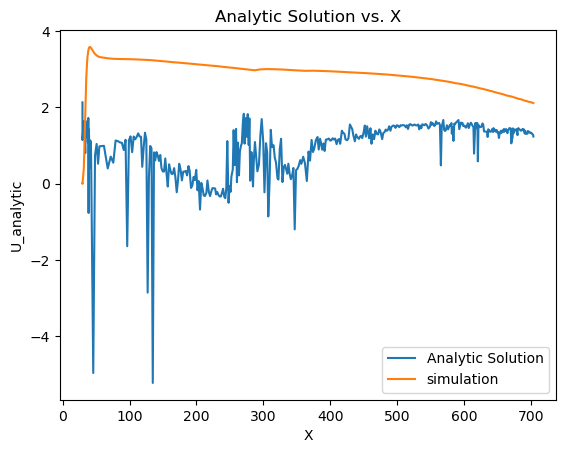

In [ ]:
tip_radius = 1 / mean_curvature_list



MC_INF = 0.1

landa = 1.5957

a1 = 0.8839

d0 = a1 /landa # a1/lamda

eps = 0.02

x_list = x_list * landa / a1

U_analytic = ( - d0 * ( 1 - 15 * eps ) / tip_radius - Theta_i_list )  / MC_INF

plt.plot(x_list, U_analytic, label='Analytic Solution')

plt.plot( x_list,U_list, label='simulation')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('U_analytic')
plt.title('Analytic Solution vs. X')
plt.legend()

# Show the plot
plt.show() 

In [ ]:
df_image = pd.read_csv( "Actual_data.csv" ) 

df_image.keys()

df_image.columns = ['x', 'y']

# Now, df_image has columns named 'x' and 'y'
print(df_image.head())

x_values_image = df_image['x'].values
y_values_image = df_image['y'].values



           x         y
0  35.525133  1.775463
1  36.578261  0.229525
2  35.008033  0.165559
3  36.770361  0.827597
4  37.522652  0.757394


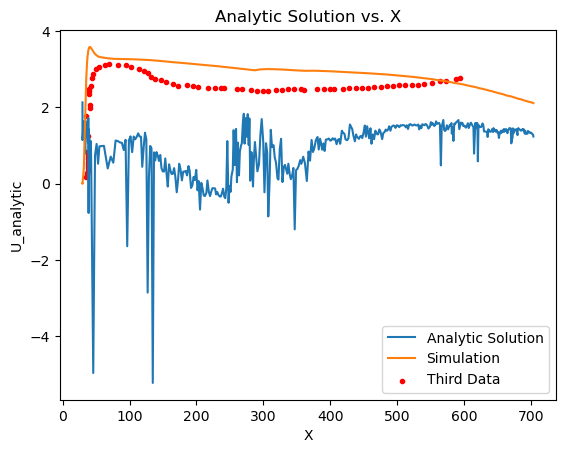

In [ ]:
# Plot the first two sets of data
plt.plot(x_list, U_analytic, label='Analytic Solution')
plt.plot(x_list, U_list, label='Simulation')

# Plot the third set of data with dots
plt.scatter(x_values_image, y_values_image, color='red', marker='.', label='Third Data')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('U_analytic')
plt.title('Analytic Solution vs. X')
plt.legend()

# Show the plot
plt.show()

In [ ]:
grouped_time.get_group(0)



TimeStep  Time   Phi    Theta    U   Points:0  Points:1  Points:2
0           0   0.0    0.9    -0.55  0.0    15.269    20.559         0
1           0   0.0    0.9    -0.55  0.0    15.440    20.374         0
2           0   0.0    0.9    -0.55  0.0    14.967    20.723         0
3           0   0.0    0.9    -0.55  0.0    15.214    20.598         0
4           0   0.0    0.9    -0.55  0.0    14.803    20.891         0
..        ...   ...    ...      ...  ...       ...       ...       ...
843         0   0.0    0.9    -0.55  0.0   -17.707   -18.503         0
844         0   0.0    0.9    -0.55  0.0   -18.092   -18.125         0
845         0   0.0    0.9    -0.55  0.0   -17.681   -18.528         0
846         0   0.0    0.9    -0.55  0.0   -17.270   -18.916         0
847         0   0.0    0.9    -0.55  0.0   -17.248   -18.936         0

[848 rows x 8 columns]